In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./Dataset/Anonymized/merged_output.csv')

In [4]:
df.head()

,ID,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,Label
0,1,0.969933,0.745092,0.338964,0.203704,0.192240,0.179081,0.142945,0.113757,0.112544,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.954212,0.782285,0.375668,0.329545,0.265507,0.172161,0.178812,0.159194,0.153897,...,0.200475,0.20206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.582840,0.594000,0.387574,0.343849,0.324921,0.339117,0.336457,0.337328,0.348487,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.913828,0.795327,0.400676,0.310588,0.301176,0.304375,0.255882,0.242672,0.240821,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.785235,0.699664,0.363341,0.113830,0.121350,0.158869,0.213419,0.217251,0.215251,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.pop("ID")

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: ID, Length: 100, dtype: int64

In [6]:
df.pop("Label")

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: Label, Length: 100, dtype: float64

In [20]:
df2 = pd.read_csv('./Dataset/Input/mitbih_test.csv',header = None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df2.shape

(87554, 188)

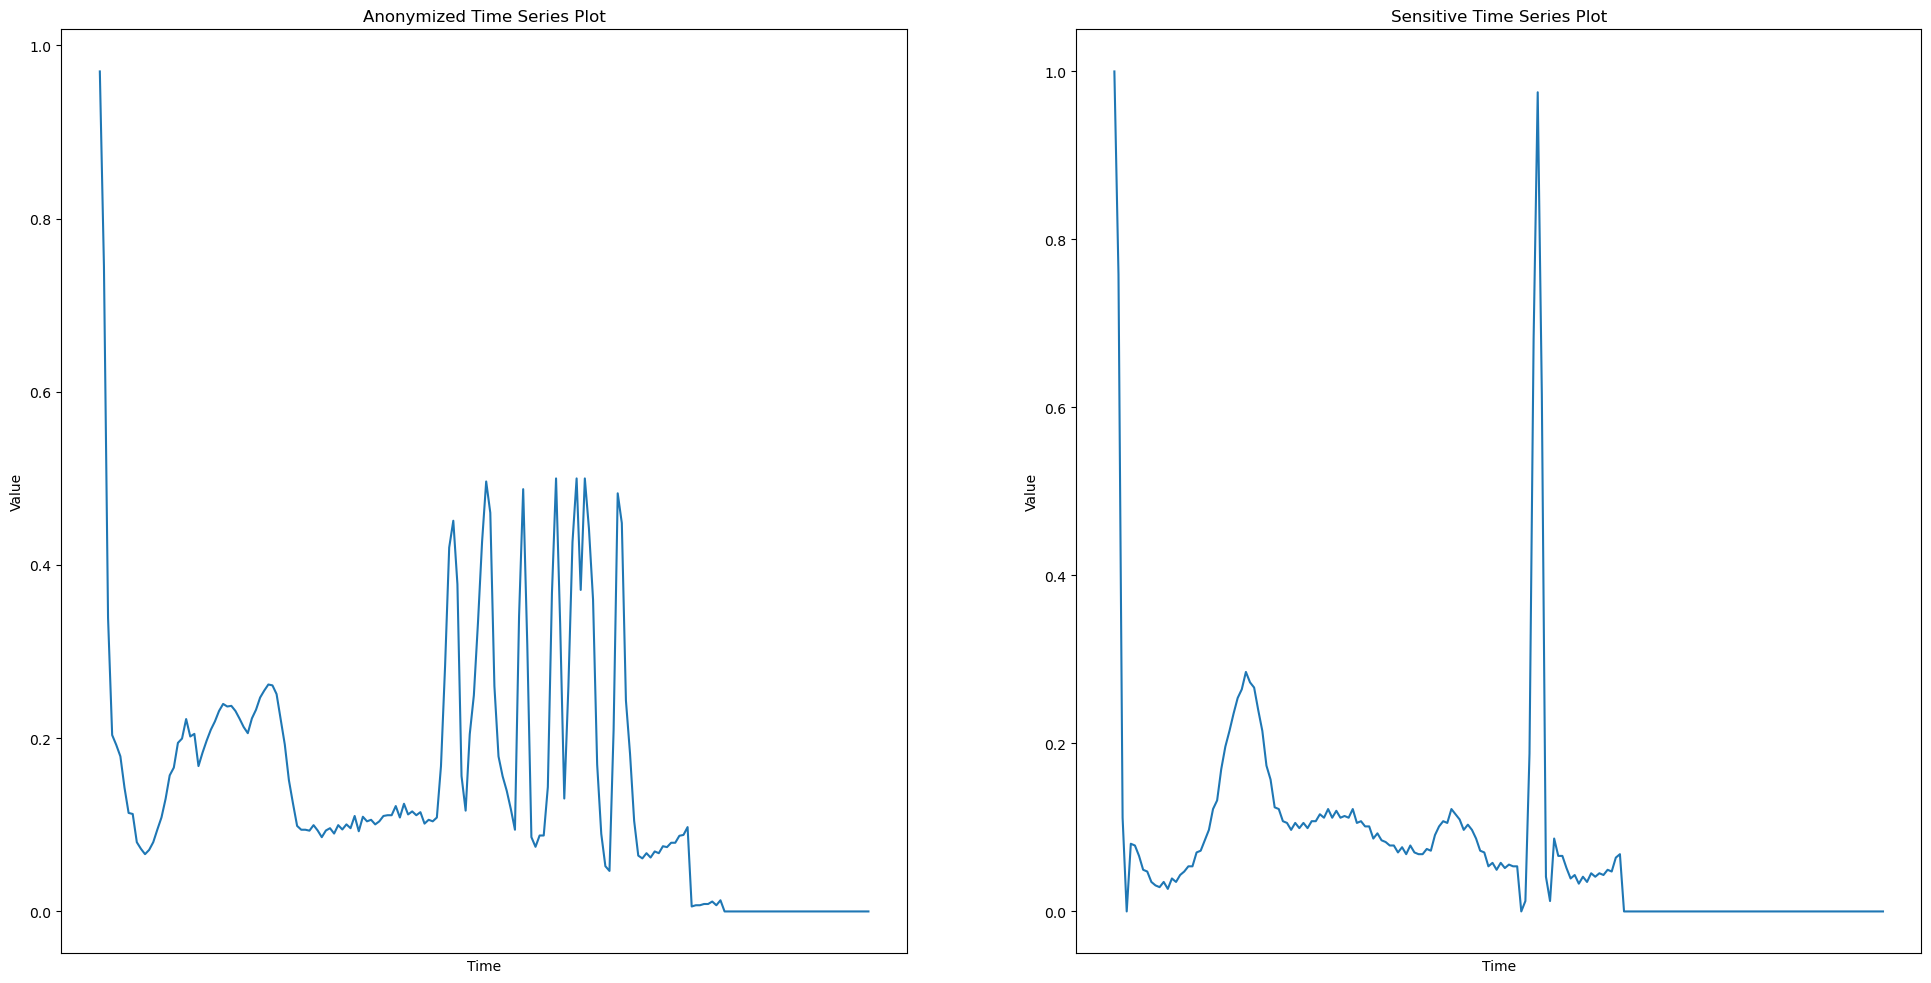

In [25]:
import matplotlib.pyplot as plt

# Plot Plot the the first first row row of of the the 
plt.figure(figsize=(24,12))

# Plot the first row of df
plt.subplot(1, 2, 1)
plt.plot(df.columns, df.iloc[0])
plt.title('Anonymized Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(False)
plt.xticks([])

# Plot the first row of df2
plt.subplot(1, 2, 2)
plt.plot(df2.columns, df2.iloc[0])
plt.title('Sensitive Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(False)
plt.xticks([])

plt.savefig('Anonymized_vs_Sensitive.png')
#plt.show()


In [6]:
time_series = pd.read_csv('./Dataset/Input/mitbih_test.csv', header=None)


In [9]:
label_counts = time_series.iloc[:,-1].value_counts()
print(label_counts)

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [7]:
last_column = time_series.columns[-1]

time_series = time_series.groupby(last_column).apply(lambda x: x.sample(n=1000)).reset_index(drop=True)
# Split the time_series dataframe into train and test sets
#train, test = train_test_split(time_series, train_size=5000, stratify=time_series.iloc[:, -1])
#time_series = train
time_series.insert(0, 'ID', range(1, 1 + len(time_series)))

ValueError: Cannot take a larger sample than population when 'replace=False'